<a href="https://colab.research.google.com/github/srilamaiti/spring_2023_w266_final_project_heesuk_iris_srila/blob/main/srila/eng_feedback_prize_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.4 MB/s eta 0:00:00


In [ ]:
import transformers
print(f'transformers version: {transformers.__version__}')
from transformers import logging as hf_logging
hf_logging.set_verbosity_error()

transformers version: 4.26.1


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.layer_utils import count_params

from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Multiply
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import PReLU
from keras.layers.core import Activation
from keras.layers.convolutional import SeparableConv1D
from keras.layers.convolutional import SeparableConv2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import *
from keras.applications.resnet import ResNet152
from keras.applications.nasnet import NASNetMobile
from keras.applications.nasnet import NASNetLarge
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import preprocess_input
from keras.applications import MobileNetV2
from keras.applications.xception import Xception
from keras.applications.inception_v3 import *

from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img

from tensorflow.python.ops.numpy_ops import np_config

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

from tensorflow.keras.losses import mae
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy

from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def set_seed(seed = 99):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

set_seed(20230214)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [ ]:
test_df.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [ ]:
train_df.shape, test_df.shape

((3911, 8), (3, 2))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text_id        3911 non-null   object 
 1   full_text      3911 non-null   object 
 2   cohesion       3911 non-null   float64
 3   syntax         3911 non-null   float64
 4   vocabulary     3911 non-null   float64
 5   phraseology    3911 non-null   float64
 6   grammar        3911 non-null   float64
 7   conventions    3911 non-null   float64
 8   word_count     3911 non-null   int64  
 9   full_text_len  3911 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 305.7+ KB


In [ ]:
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
label_cols = train_df.columns[2:]
label_cols

Index(['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar',
       'conventions'],
      dtype='object')

In [45]:
train_df[label_cols].drop_duplicates()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
5,3.5,4.0,4.0,3.5,3.5,4.0
6,3.5,4.0,3.5,3.5,4.0,4.0
7,2.5,2.5,2.5,2.5,2.5,2.0
8,3.0,3.0,3.5,3.5,3.0,3.0
9,3.0,3.0,3.5,2.5,3.0,2.5


In [46]:
train_df[label_cols].value_counts()

cohesion  syntax  vocabulary  phraseology  grammar  conventions
3.0       3.0     3.0         3.0          2.5      3.0            19
3.5       3.5     3.5         3.5          3.5      3.5            17
2.5       2.5     3.0         2.5          2.5      3.0            17
3.0       3.0     3.0         3.0          2.5      2.5            15
2.5       2.5     3.0         3.0          2.5      2.5            15
3.0       3.0     3.0         3.0          3.0      3.5            14
2.5       2.5     3.0         2.5          2.5      2.5            14
3.0       3.0     3.0         3.0          3.0      3.0            14
          2.5     3.0         2.5          2.5      2.5            13
3.5       3.0     3.5         3.5          3.5      3.5            12
                                                    3.0            12
          3.5     3.5         3.0          3.0      3.5            12
2.5       2.5     2.5         2.5          2.5      2.5            11
3.0       2.5     3.0     

In [47]:
label_cols

Index(['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar',
       'conventions'],
      dtype='object')

In [52]:
train_df[(train_df.cohesion == 5) & (train_df.syntax == 5) & (train_df.vocabulary == 5) & (train_df.phraseology == 5) & (train_df.grammar == 5) & (train_df.conventions == 5)][['full_text']]

,full_text
2389,I agree with Michelangelo's statement as I hav...


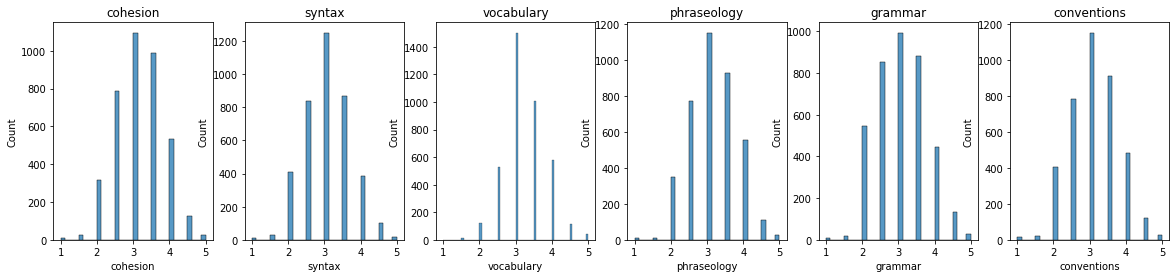

In [ ]:
fig, ax = plt.subplots(1, len(label_cols), figsize=(20,4))

for idx, label in enumerate(label_cols):
    sns.histplot(x = label, 
                 data = train_df,
                 ax = ax[idx]
                )
    ax[idx].set_title(label)
    

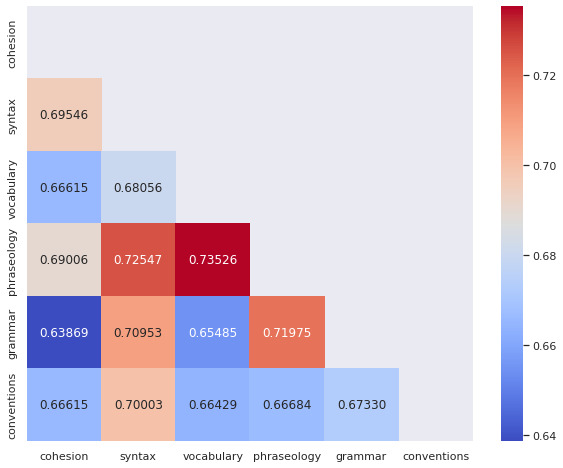

In [ ]:
corr = train_df[label_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.set(rc = {"figure.figsize": (10, 8)})

sns.heatmap(corr, 
            annot = True, 
            cmap = "coolwarm", 
            mask = mask,
            fmt  = ".5f")
plt.show()

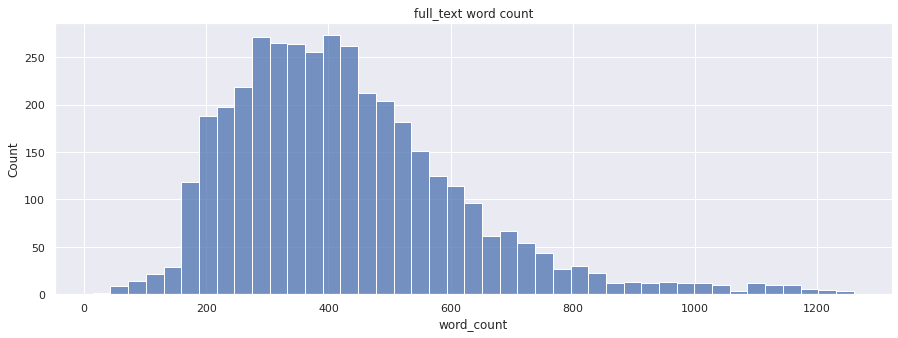

In [ ]:
fig = plt.figure(figsize=(15, 5))
train_df['word_count'] = train_df['full_text'].apply(lambda x: len(x.split()))
sns.histplot(data = train_df, x = "word_count")
plt.title("full_text word count")
plt.show()

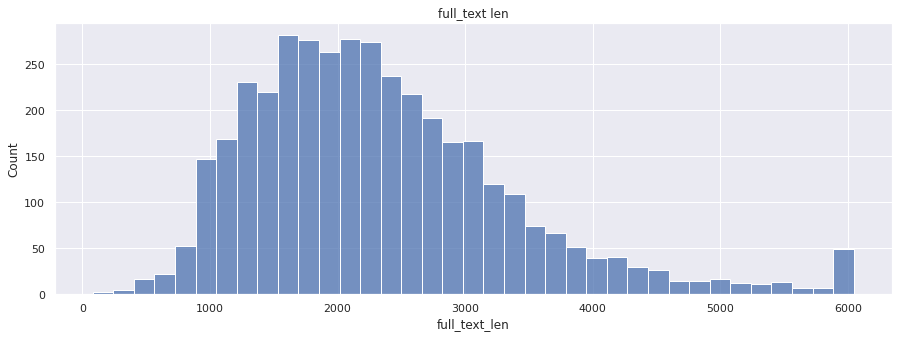

In [ ]:
fig = plt.figure(figsize=(15, 5))
train_df['full_text_len'] = train_df['full_text'].apply(lambda x: len(x))
sns.histplot(data = train_df, x = "full_text_len")
plt.title("full_text len")
plt.show()

In [ ]:
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count,full_text_len
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053,430.492969,2334.522373
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450,191.868449,1033.406009
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,82.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,294.000000,1597.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,402.000000,2173.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,526.500000,2866.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1260.000000,6044.000000
